In [2]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

In [3]:
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# import streamlit as st (cannot use streamlit due to python version 3.9, switch to 3.11 for streamlit, however keras will stop working in 3.11)

In [ ]:
## load the data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
## age: age of the patient
## anaemia: decrease of red blood cells or hemoglobin (boolean)
## creatinine_phosphokinase: level of the CPK enzyme in the blood (mcg/L)
## diabetes: if the patient has diabetes (boolean)
## ejection_fraction: percentage of blood leaving the heart at each contraction (percentage)
## high_blood_pressure: if the patient has hypertension (boolean)
## platelets: platelets in the blood (kiloplatelets/mL)
## serum_creatinine: level of serum creatinine in the blood (mg/dL)
## serum_sodium: level of serum sodium in the blood (mEq/L)
## sex: woman or man (binary)
## smoking: if the patient smokes or not (boolean)
## time: follow-up period (days)
## DEATH_EVENT: if the patient deceased during the follow-up period (boolean)

## Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)

In [ ]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
## 96 out of 299 death events from heart failure during the follow-up period

[Text(0, 0, '203'), Text(0, 0, '96')]

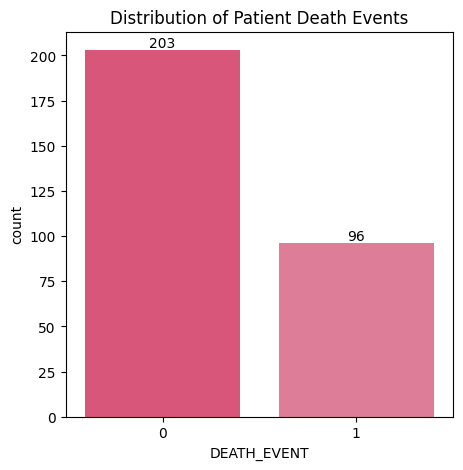

In [ ]:
plt.figure(figsize=(5, 5))
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplot().set_title('Distribution of Patient Death Events')
ax = sns.countplot(x='DEATH_EVENT', palette=cmap, data=df)
ax.bar_label(ax.containers[0])

In [ ]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [ ]:
## 125 patients have diabetes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
## fairly small dataset
## There are 299 non-null values in all the attributes thus no missing values
## Datatype is also either 'float64' or 'int64' which works well while feeded to an algorithm

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
## DATA ANALYSIS

In [ ]:
df_gender = pd.DataFrame(df['sex'].value_counts())

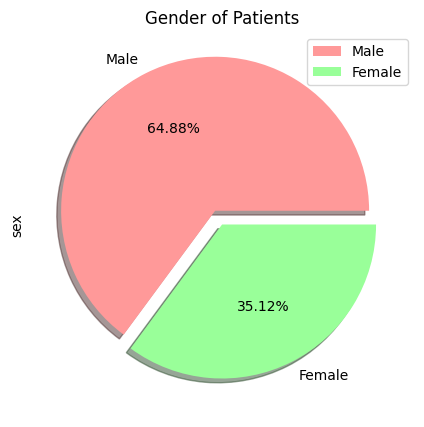

In [ ]:
df_gender.reset_index(inplace= True)
fig, ax=plt.subplots()

# add colors
colors=['#ff9999','#99ff99']

# only "explode" the 2nd slice
explode=(0.1, 0)

df_gender.plot(kind='pie', y='sex', title = 'Gender of Patients', labels = ['Male', 'Female'], autopct='%1.2f%%', ax=ax, figsize=(5,5), colors=colors, explode=explode, shadow=True)
plt.show()

In [ ]:
## correlation matrix

corr_matrix = df.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: >

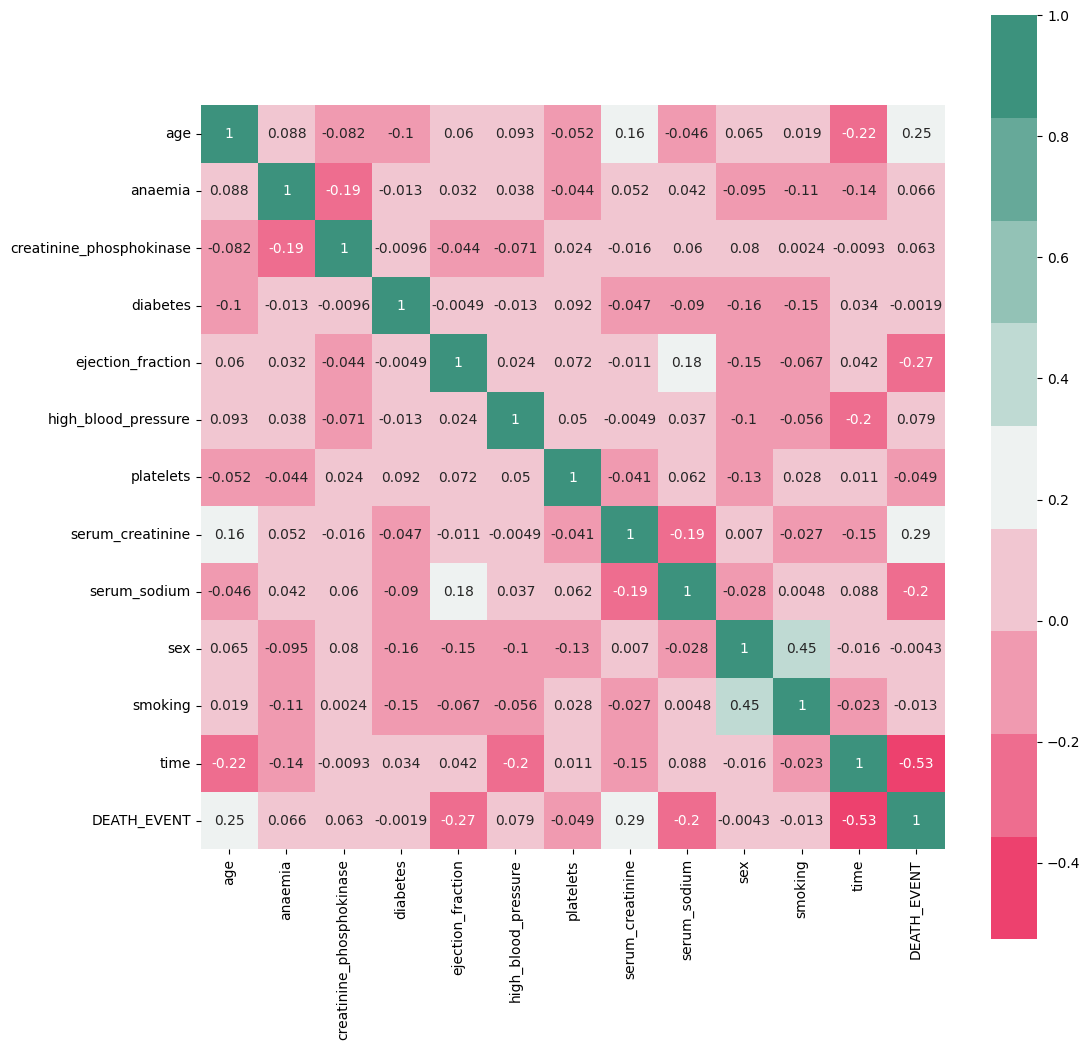

In [ ]:
##heatmap

plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, square=True)

<Axes: >

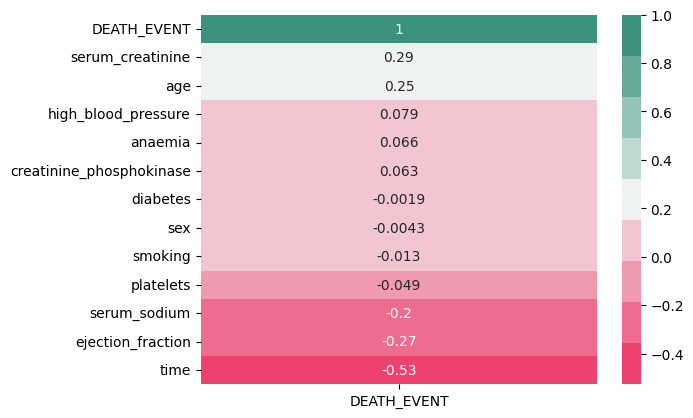

In [ ]:
## show correlation with death event

survived_corr_matrix = corr_matrix['DEATH_EVENT'].sort_values(ascending=False)
sns.heatmap(survived_corr_matrix.to_frame(), cmap=cmap, annot=True)

/var/folders/7l/p5dfl2013y56c2bbypcf68000000gn/T/ipykernel_4615/2390077770.py:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.histplot(x='age', hue='anaemia', palette=cmap, data=df)
/var/folders/7l/p5dfl2013y56c2bbypcf68000000gn/T/ipykernel_4615/2390077770.py:7: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.histplot(x='age', hue='diabetes', palette=cmap, data=df)
/var/folders/7l/p5dfl2013y56c2bbypcf68000000gn/T/ipykernel_4615/2390077770.py:9: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.histplot(x='age', hue='high_blood_pressure', palette=cmap, data=df)
/var/folders/7l/p5dfl2013y56c2bbypcf68000000gn/T/ipykernel_4615/2390077770.py:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.histplot(x='age', hue='smoking', palette=cmap, data=df)
/var/folders/7l/p5dfl2013y56c2bbypcf68

<Axes: title={'center': 'Distribution of Patients Age by Death'}, xlabel='age', ylabel='Count'>

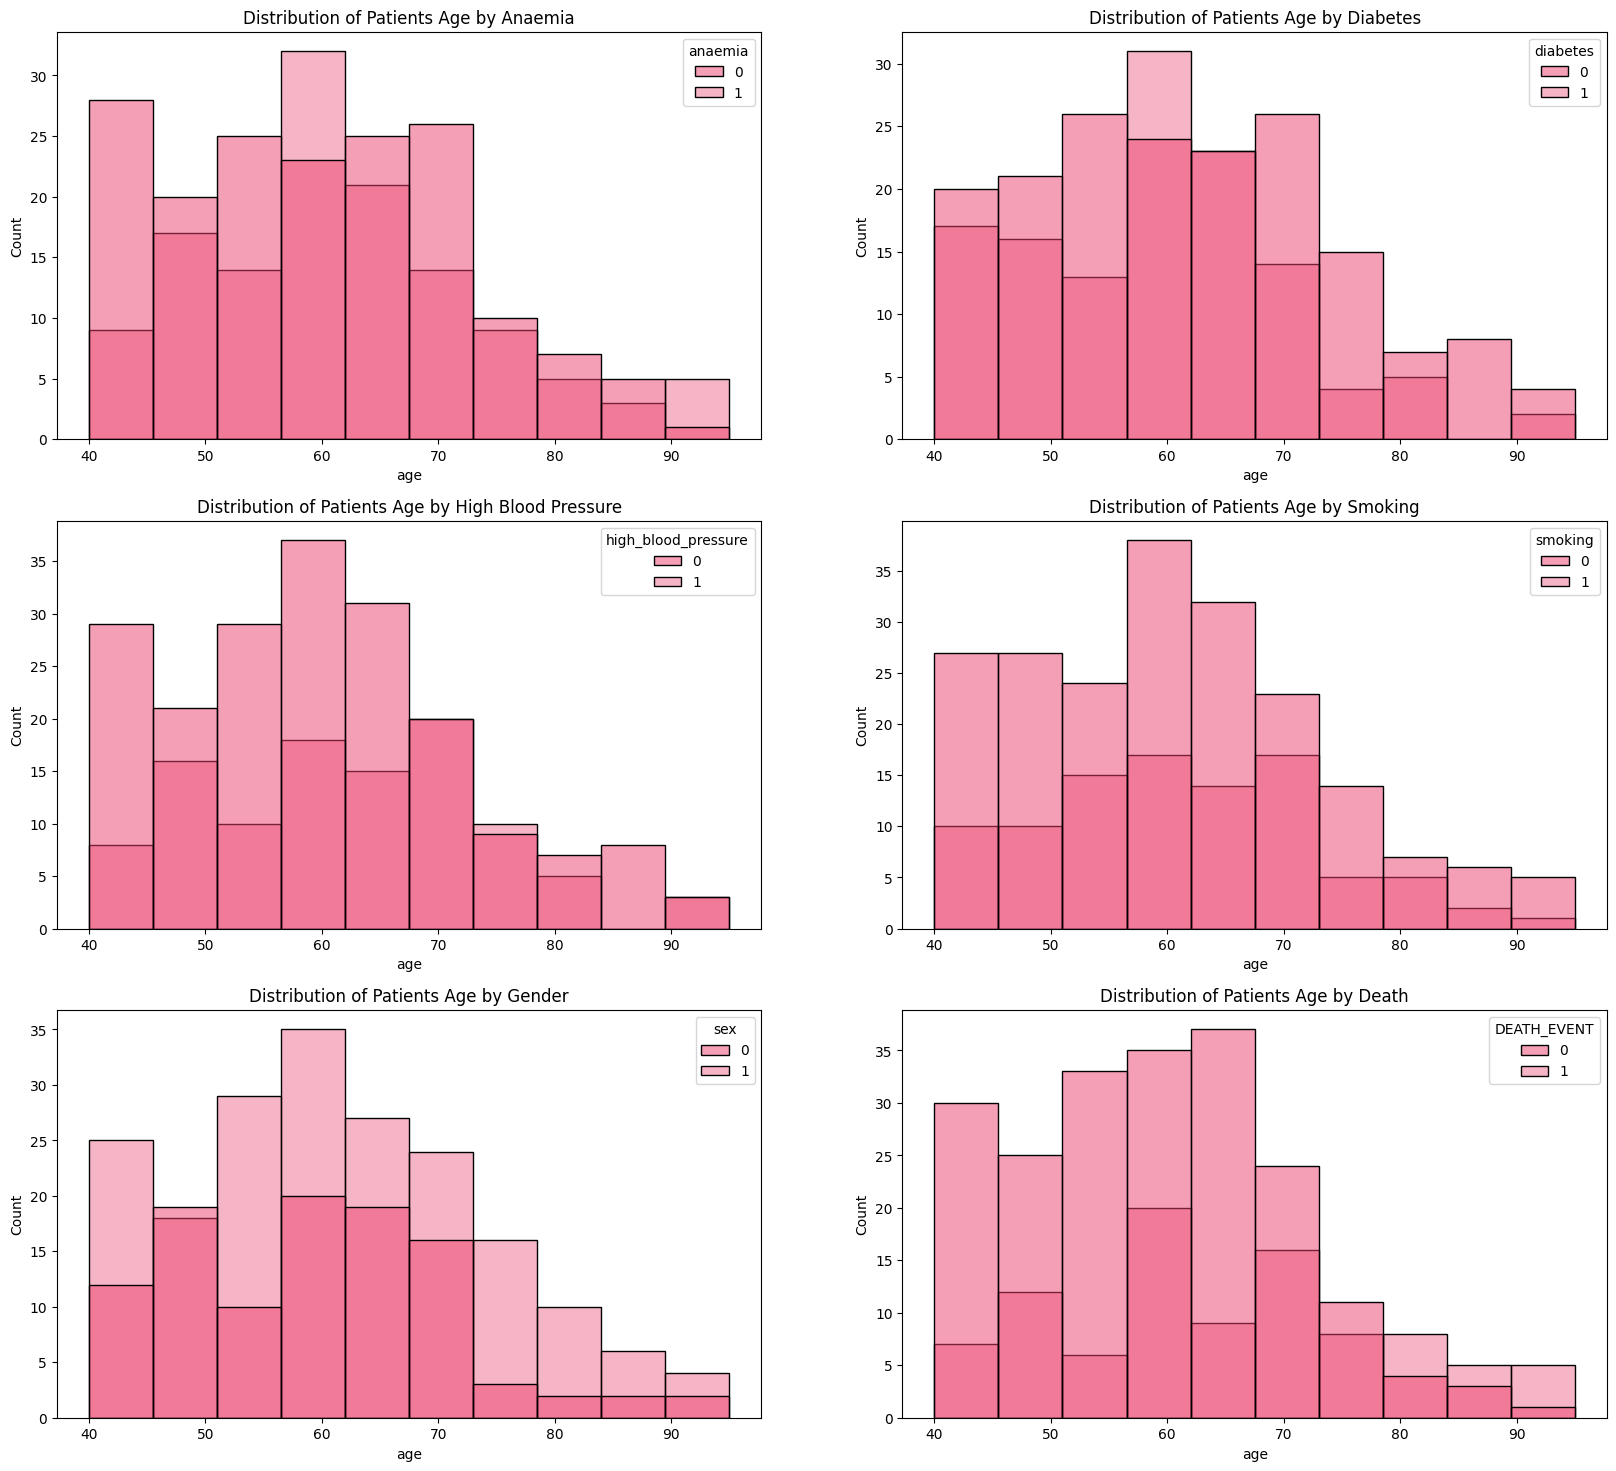

In [ ]:
## histogram: distribution of patients age by anaemia, diabetes, high blood pressure and smoking

plt.figure(figsize=(20, 18))
plt.subplot(321).set_title('Distribution of Patients Age by Anaemia')
sns.histplot(x='age', hue='anaemia', palette=cmap, data=df)
plt.subplot(322).set_title('Distribution of Patients Age by Diabetes')
sns.histplot(x='age', hue='diabetes', palette=cmap, data=df)
plt.subplot(323).set_title('Distribution of Patients Age by High Blood Pressure')
sns.histplot(x='age', hue='high_blood_pressure', palette=cmap, data=df)
plt.subplot(324).set_title('Distribution of Patients Age by Smoking')
sns.histplot(x='age', hue='smoking', palette=cmap, data=df)
## histogram: distribution of patients age by sex and age by death
plt.subplot(325).set_title('Distribution of Patients Age by Gender')
sns.histplot(x='age', hue='sex', palette=cmap, data=df)
plt.subplot(326).set_title('Distribution of Patients Age by Death')
sns.histplot(x='age', hue='DEATH_EVENT', palette=cmap, data=df)

<Axes: title={'center': 'Distribution of Patients Gender by Death'}, xlabel='sex', ylabel='count'>

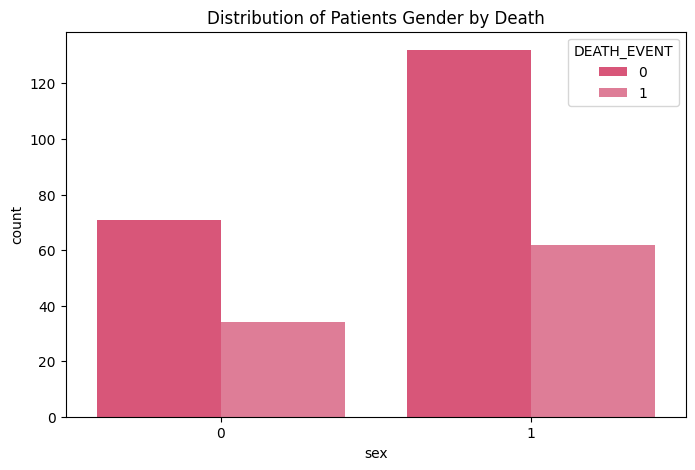

In [ ]:
## distribution of patients gender by death

plt.figure(figsize=(8, 5))
plt.subplot().set_title('Distribution of Patients Gender by Death')
sns.countplot(x='sex', hue='DEATH_EVENT', palette=cmap, data=df)

In [ ]:
## boxplots
## using only non binary columns to check for potential outliers

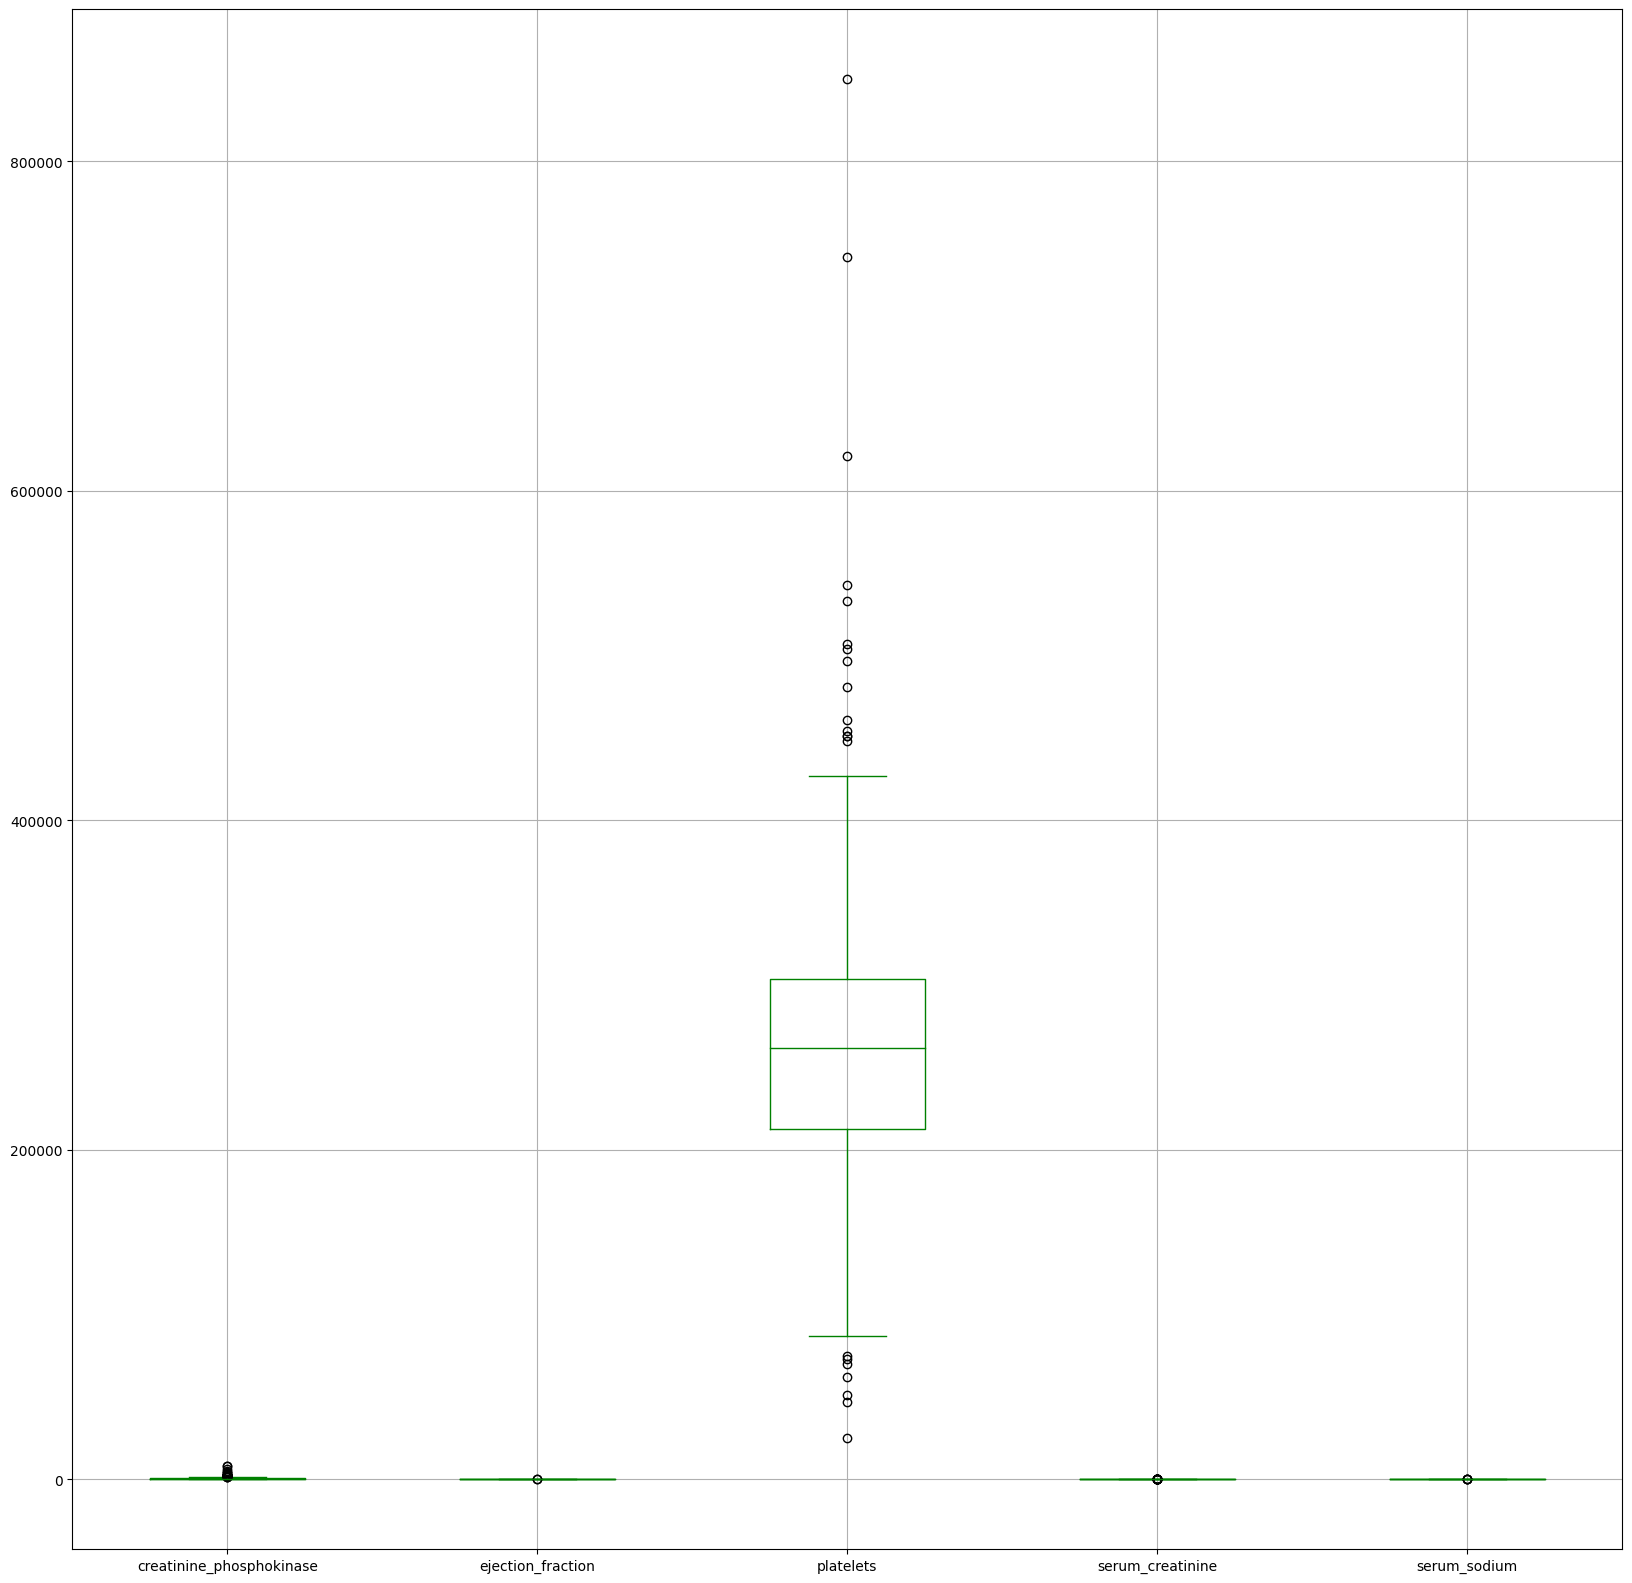

In [ ]:
df.boxplot(column=["creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"], figsize=(20,20), color='green')
plt.show()

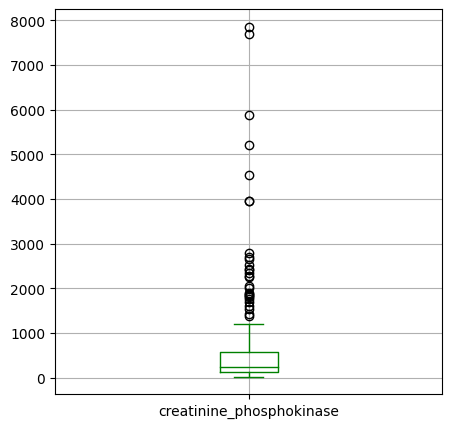

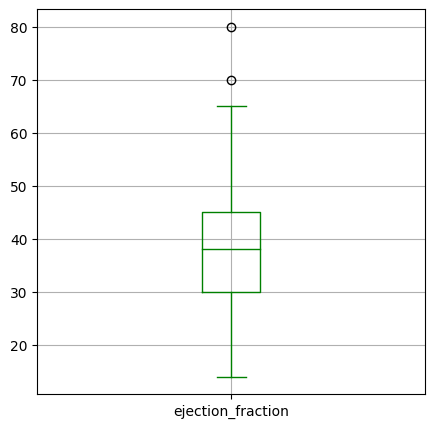

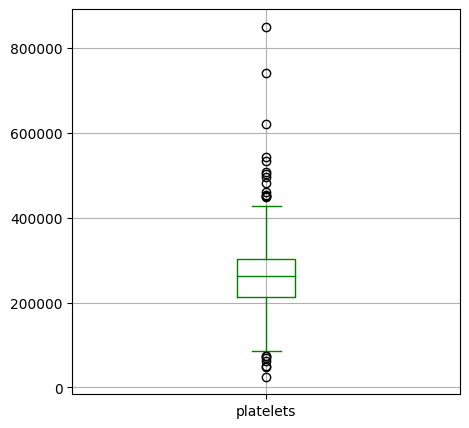

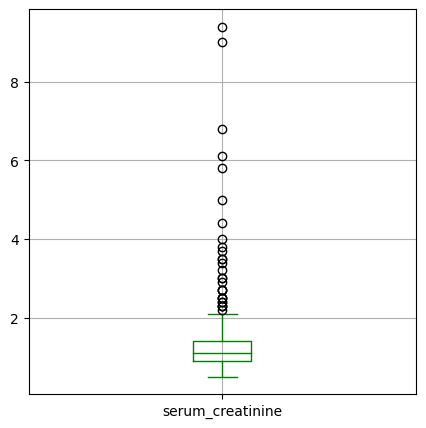

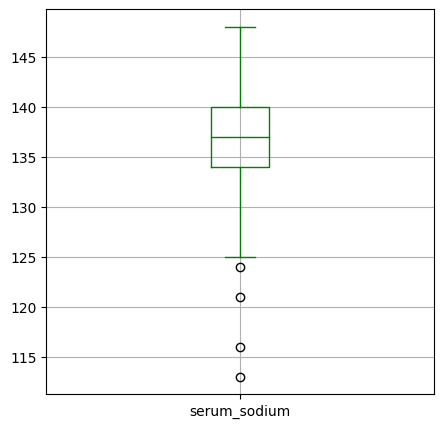

In [ ]:
df.boxplot(column='creatinine_phosphokinase', figsize=(5,5), color='green')
plt.show()
df.boxplot(column='ejection_fraction', figsize=(5,5), color='green')
plt.show()
df.boxplot(column='platelets', figsize=(5,5), color='green')
plt.show()
df.boxplot(column='serum_creatinine', figsize=(5,5), color='green')
plt.show()
df.boxplot(column='serum_sodium', figsize=(5,5), color='green')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


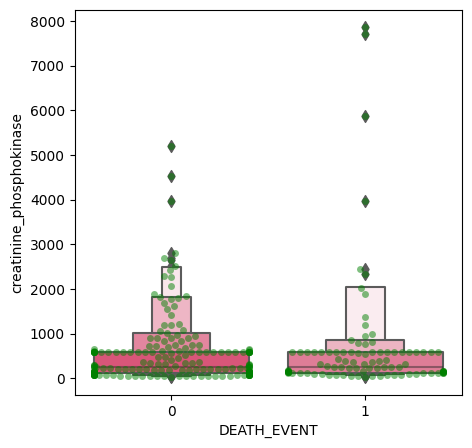

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


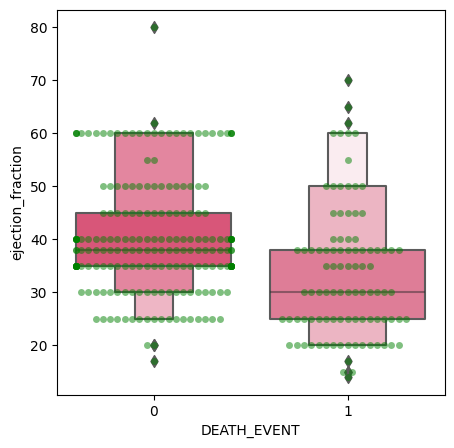

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


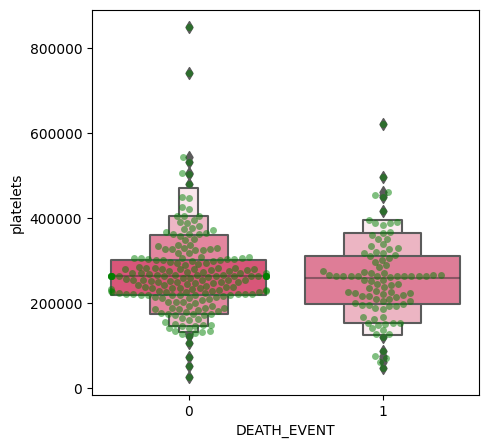

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


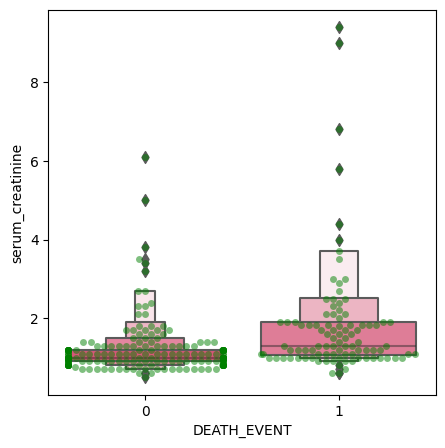

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


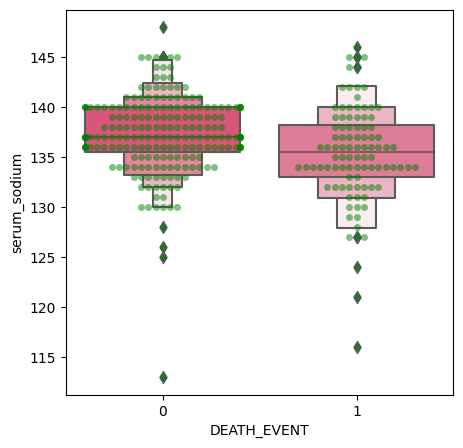

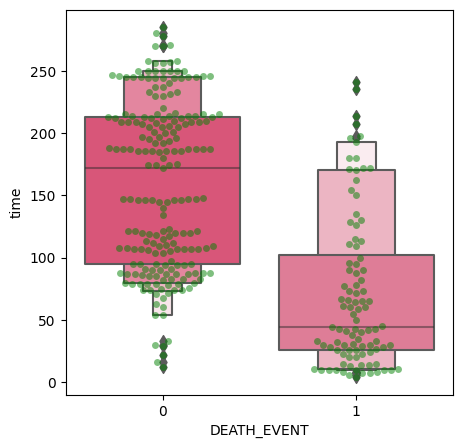

In [ ]:
feature = ["creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(5,5))
    sns.swarmplot(x=df['DEATH_EVENT'], y=df[i], color='green', alpha=0.5)
    sns.boxenplot(x=df["DEATH_EVENT"], y=df[i], palette=cmap)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 41.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


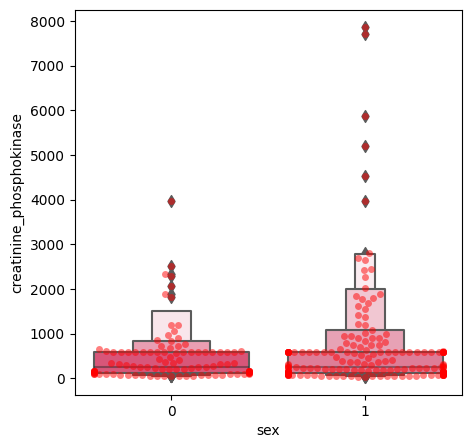

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


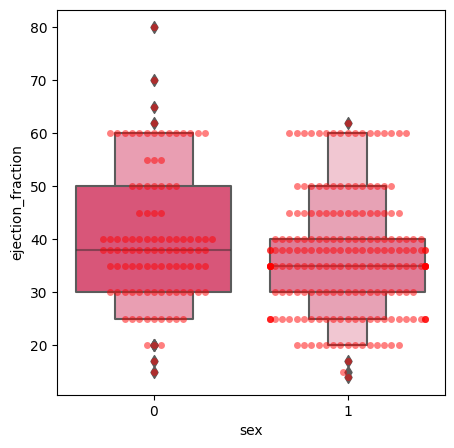

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


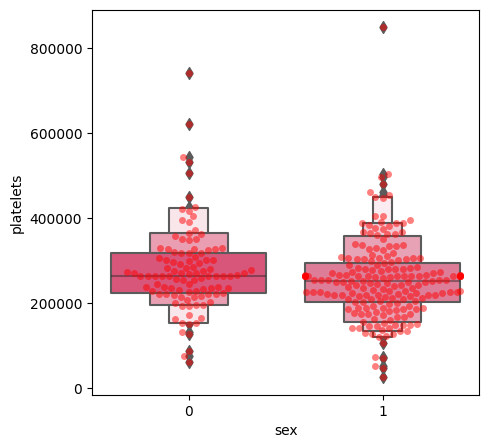

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


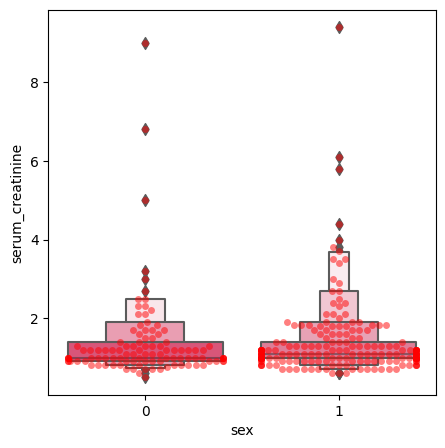

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


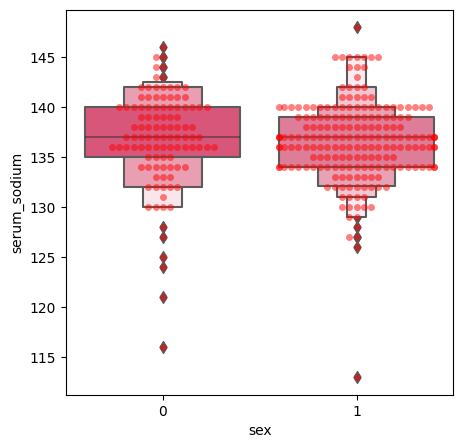

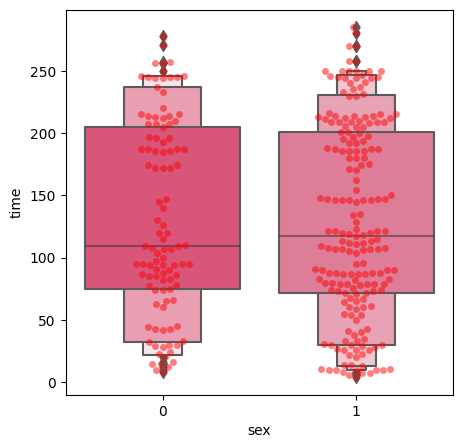

In [ ]:
feature = ["creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(5,5))
    sns.swarmplot(x=df['sex'], y=df[i], color='red', alpha=0.5)
    sns.boxenplot(x=df["sex"], y=df[i], palette=cmap)
    plt.show()

In [ ]:
## DATA PREPROCESSING

## due to the small size of the data, we will not drop any coloumns even though there is a large number of outliers

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
## split the data into independent and dependent variable (making DEATH_EVENT the y variable)
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [ ]:
# Using standard scaler to standardise the varying data
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [ ]:
## split the data into training and testing set by 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state = 32)

In [ ]:
## LOGISTIC REGRESSION

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
##  make the prediction

pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
...,...,...
16,1,1
194,1,0
289,0,0
39,1,1


In [ ]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)

0.8416666666666667
[[69  7]
 [12 32]]


In [ ]:
## NAIVE BAYES

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
## predict the test set

y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
109,0,1
264,0,0
285,0,0
19,1,1
123,0,0
...,...,...
16,1,1
194,1,0
289,0,0
39,1,0


In [ ]:
## predict the test set

y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
109,0,1
264,0,0
285,0,0
19,1,1
123,0,0
...,...,...
16,1,1
194,1,0
289,0,0
39,1,0


In [ ]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.7083333333333334
[[66 10]
 [25 19]]


In [ ]:
## K-Nearest Neighbours

Knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
##train my model
Knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
## Make prediction

y_pred_knn = Knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
109,0,1
264,0,0
285,0,0
19,1,1
123,0,0
...,...,...
16,1,0
194,1,0
289,0,1
39,1,0


In [ ]:
## Evaluate the knn model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

print(accuracy_knn)
print(conf_mat_knn)

0.575
[[62 14]
 [37  7]]


In [ ]:
## Decision tree classifier
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)

In [ ]:
## training my models
Decision_tree_gini.fit(X_train,y_train)
Decision_tree_entropy.fit(X_train,y_train)
Decision_tree_max_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
## make prediction
y_pred_gini = Decision_tree_gini.predict(X_test)
y_pred_entropy = Decision_tree_entropy.predict(X_test)
y_pred_depth3 = Decision_tree_max_depth.predict(X_test)

In [ ]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
...,...,...
16,1,0
194,1,1
289,0,0
39,1,1


In [ ]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
...,...,...
16,1,1
194,1,1
289,0,0
39,1,1


In [ ]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth3})

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
...,...,...
16,1,0
194,1,1
289,0,0
39,1,1


In [ ]:
## model evaluation
## Evaluate the gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)

print(accuracy_gini)
print(conf_mat_gini)

0.775
[[67  9]
 [18 26]]


In [ ]:
## Evaluate the entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)

print(accuracy_entropy)
print(conf_mat_entropy)

0.8166666666666667
[[62 14]
 [ 8 36]]


In [ ]:
## Evaluate the max_depth
accuracy_max_depth = accuracy_score(y_test, y_pred_depth3)
conf_mat_max_depth = confusion_matrix(y_test, y_pred_depth3)

print(accuracy_max_depth)
print(conf_mat_max_depth)

0.7583333333333333
[[63 13]
 [16 28]]


In [ ]:
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [ ]:
## Neural Network

## initialise the NN
model = Sequential()

## set up the layers
## input layer
model.add(Dense(units= 15, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))

## hidden layer
## model.add(Dense(units= 5, kernel_initializer= 'uniform', activation = 'relu'))

##regularization
## model.add(Dropout(0.2))
## output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
## train the model
history = model.fit(X_train, y_train, batch_size = 128, epochs =100, validation_split= 0.25)

Epoch 1/100


2023-02-28 14:56:59.515286: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 0s 107ms/step - loss: 495.6173 - accuracy: 0.2985 - val_loss: 373.2090 - val_accuracy: 0.2667
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 392.2202 - accuracy: 0.2985 - val_loss: 284.5080 - val_accuracy: 0.2667
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 297.6843 - accuracy: 0.2985 - val_loss: 204.3641 - val_accuracy: 0.2667
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 213.4555 - accuracy: 0.2985 - val_loss: 127.7635 - val_accuracy: 0.2667
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 134.2069 - accuracy: 0.2985 - val_loss: 57.3302 - val_accuracy: 0.2667
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 58.8285 - accuracy: 0.2985 - val_loss: 3.1524 - val_accuracy: 0.7333
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 4.1575 - accuracy: 0.7015 - val_loss: 22.3517 - val_accuracy: 0.7333
Epoch 8/10